# sentiment analysis 

investigating the impact of community opinion on the price of cryptocurrencies market
looking at the top 5 cryptocurrencies. bitcoin , etheruem , litecoin, NEO coin, ADA coin

# hypothesis

- there is a linear correlation between sentiment score and the price

- the more source we add to the model the more occurate  result we get

# vader lexicon in nltk

VADER (Valence Aware Dictionary and sEntiment Reasoner) is a lexicon and rule-based sentiment analysis tool that is specifically attuned to sentiments expressed in social media. It is fully open-sourced under the [MIT License].

In [15]:
import pandas as pd
from scipy.stats import spearmanr, pearsonr
import matplotlib.pyplot as plt

In [16]:
def pearsonr_correaltion(x1, x2):
    corr = pearsonr(x1, x2)
    if corr[1] <= 0.05:
        return corr

In [5]:
print("ticker ::corr:: p_value")
for ticker in ["ada", "bch", "btc", "eos", "eth", "ltc", "neo", "xrp"]:
    data = pd.read_csv(f"../data/vader_{ticker}.csv")
    # data =data[data.time>'2017-01-01']
    # data =data[data.time>'2017-12-29']
    corr = pearsonr_correaltion(data.mid, data.score_reddit)
    if corr is not None:
        print(f"{ticker.upper()}    ::{corr[0]:.2f}:: {corr[1]}")

ticker ::corr:: p_value
ADA    ::0.51:: 6.80748689186657e-24
BTC    ::0.28:: 3.5128277795463994e-10
EOS    ::0.68:: 6.984405479895594e-47
ETH    ::0.36:: 8.469434002366834e-12
LTC    ::0.29:: 8.163414194669432e-08
NEO    ::0.41:: 3.721248298487118e-15


In [6]:
for ticker in ['ada','bch','btc','eos','eth','ltc','neo','xrp']:
    data = pd.read_csv(f'../data/vader_{ticker}.csv')
    #data =data[data.time>'2017-01-01']
    #data =data[data.time>'2017-12-29']
    corr = pearsonr_correaltion(data.mid,data.score_btt)
    if corr is not None:
        print(f"{ticker}::{corr[0]:.2f}, with p_value {corr[1]}")

btc::0.10, with p_value 0.026301244642930068
eos::-0.20, with p_value 0.00018270793329408687
ltc::0.47, with p_value 2.588906422680858e-20
xrp::0.16, with p_value 0.0033387721456714383


In [7]:
for ticker in ['ada','bch','btc','eos','eth','ltc','neo','xrp']:
    data = pd.read_csv(f'../data/vader_{ticker}.csv')
    #data =data[data.time>'2017-01-01']
    #data =data[data.time>'2017-12-29']
    corr = pearsonr_correaltion(data.mid,data.score)
    if corr is not None:
        print(f"{ticker}::{corr[0]:.2f}, with p_value {corr[1]}")

ada::0.50, with p_value 3.381776601050529e-23
bch::0.11, with p_value 0.049326729313279485
btc::0.30, with p_value 2.995801264473421e-12
eos::0.38, with p_value 2.743469599818487e-13
eth::0.32, with p_value 1.380081752363265e-09
ltc::0.55, with p_value 1.13246212573797e-28
neo::0.38, with p_value 3.31495066306251e-13
xrp::0.13, with p_value 0.02057032955194098


# ploting the price & the lexicon score

In [19]:
from sklearn.preprocessing import MinMaxScaler 
import matplotlib.dates as mdates
def plot(ticker,column):
    data = pd.read_csv(f'../data/vader_{ticker.lower()}.csv')
    data =data[data.time>'2017-12-29']
    scaler = MinMaxScaler()
    data["score_norm"]=scaler.fit_transform(data[[column]])
    data["price_norm"]=scaler.fit_transform(data[["mid"]])
    plt.figure(figsize=(15,7))
    ax = plt.gca()
    ax.set_xlabel("date", size=5)
    ax.set_ylabel('Normalized price and score int range(0,1)', size=5)
    ax.set_title(f'{ticker.upper()}', size=5)
    data.time = pd.to_datetime(data.time)
    ax.fmt_xdata = mdates.DateFormatter('%Y-%m-%d')
    plt.xticks(rotation=70)
    plt.plot(data.time , data.score_norm, 'b.-')
    plt.plot(data.time , data.price_norm, 'r.-')
    ax.legend(['sentiment score','price'],loc="upper left")
    plt.grid()
    plt.show()

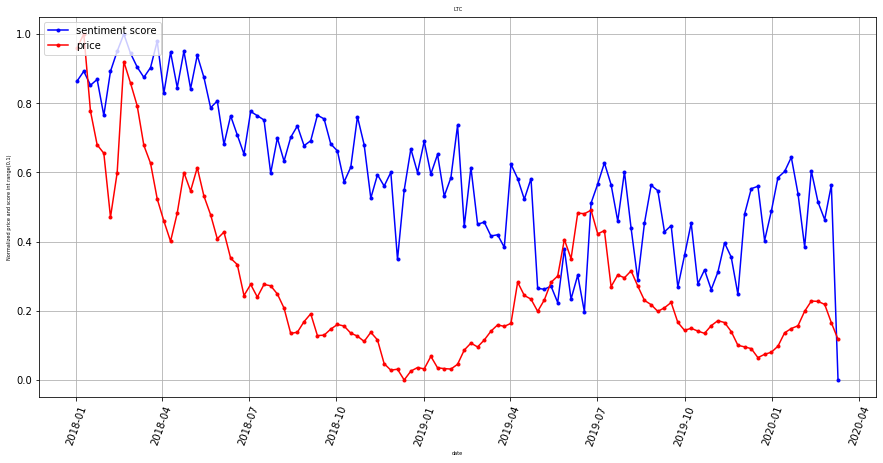

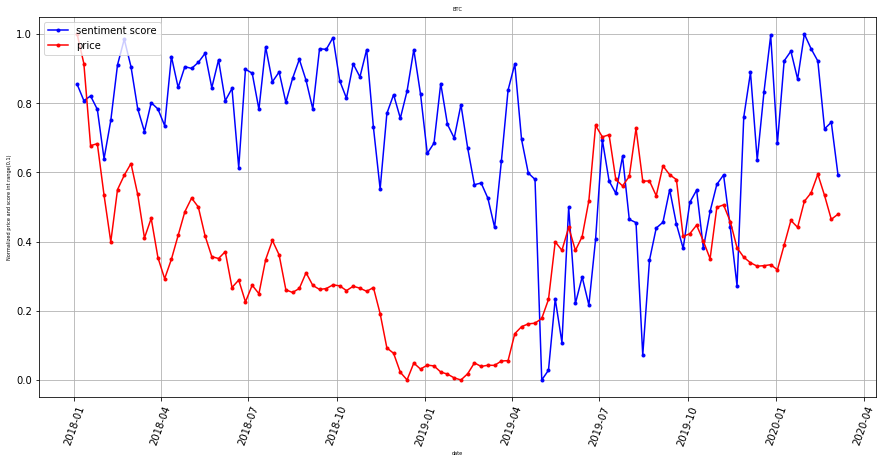

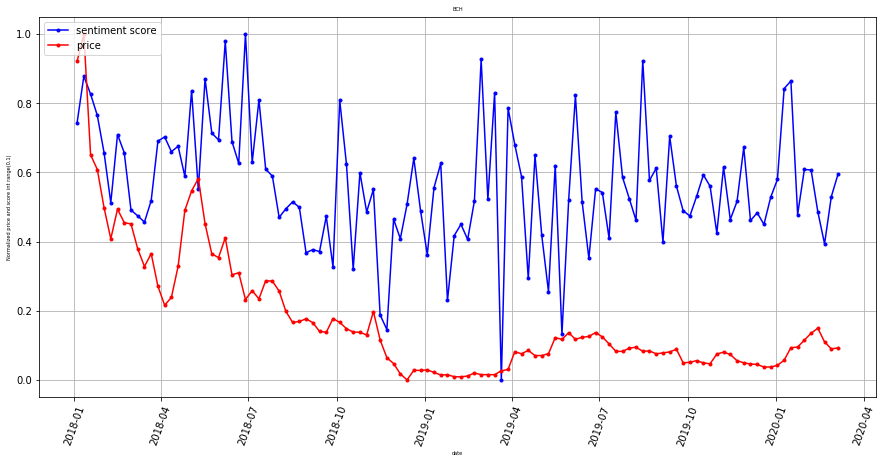

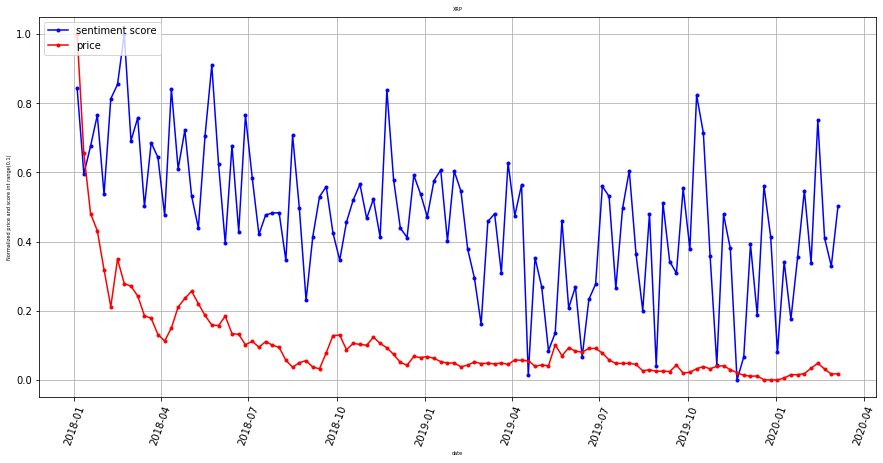

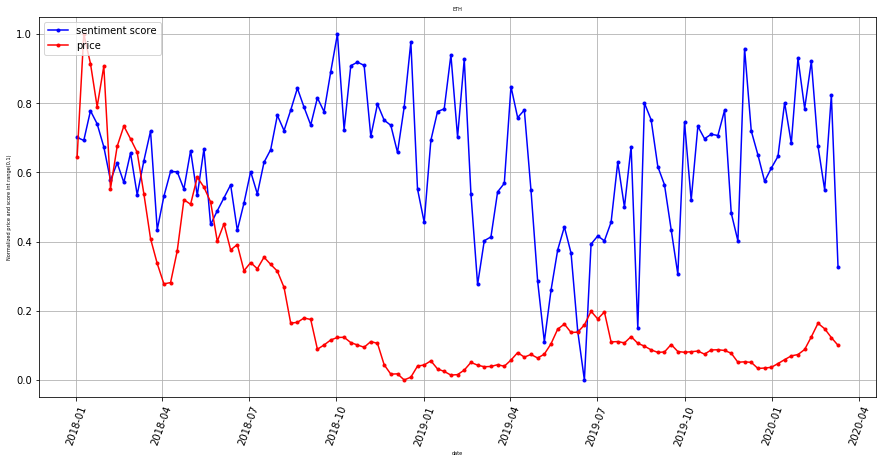

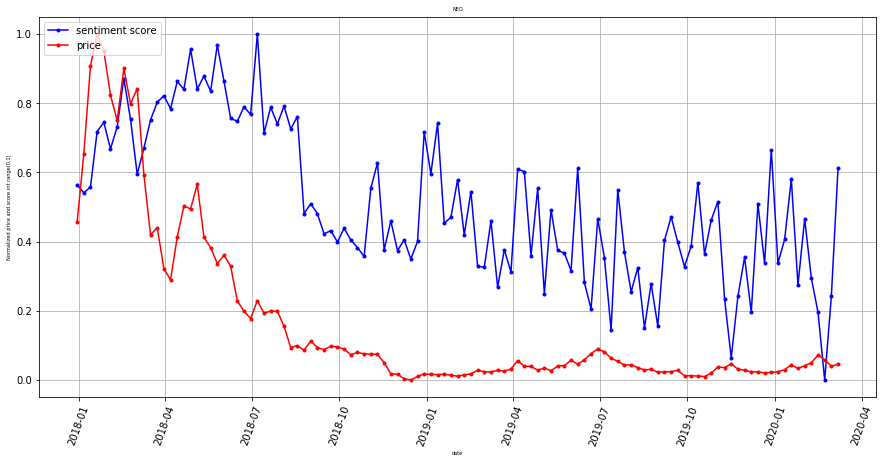

In [13]:
for ticker in ["ltc","btc",'bch','xrp','eth','neo']:
    plot(ticker,'score')